# Richter Jordaan Pset4

**Question 1**

**Question 1.1)**

In [1]:
abstract type AbstractWalker end

**Question 1.2)**

In [2]:
abstract type Abstract2DWalker <: AbstractWalker end

**Question 1.3)**

In [3]:
struct Location
    x::Int
    y::Int
end

**Question 1.4)**

In [4]:
mutable struct Walker2D <: Abstract2DWalker
    position::Location
end

**Question 1.5)**

In [5]:
methods(Walker2D)

# 2 methods for type constructor:
[1] Walker2D(position::Location) in Main at In[4]:2
[2] Walker2D(position) in Main at In[4]:2

In [6]:
w = Walker2D(Location(0,0)) 

Walker2D(Location(0, 0))

**Question 1.6)**

In [7]:
Walker(x,y)=Walker2D(Location(x,y))

Walker (generic function with 1 method)

**Question 1.7)**

In [8]:
function make_tuple(loc)
    return (loc.x,loc.y)
end

make_tuple (generic function with 1 method)

**Question 1.8)**

In [9]:
function pos(walker::Abstract2DWalker)
    return walker.position
end

pos (generic function with 1 method)

**Question 1.9)**

In [10]:
function set_pos!(walker::Abstract2DWalker,l::Location)
    walker.position = l
end

set_pos! (generic function with 1 method)

**Question 1.10)**

In [11]:
function jump(walker::Abstract2DWalker)
    loc = make_tuple(pos(walker))
    neighbors = ((loc[1]+1,loc[2]),(loc[1]-1,loc[2]),(loc[1],loc[2]-1),(loc[1],loc[2]+1))
    newloc = neighbors[rand(1:4)]
    return Location(newloc[1],newloc[2])
end

jump (generic function with 1 method)

**Question 1.11)**

In [12]:
function jump!(walker::Abstract2DWalker,L)
    set_pos!(walker,jump(walker,L))
end

jump! (generic function with 1 method)

**Question 1.12)**

In [13]:
function trajectory(walker::Abstract2DWalker,N,L)
    traj = []
    for i in 1:N
        jump!(walker,L)
        push!(traj,make_tuple(pos(walker)))
    end
    return traj
end
trajectory(walker::Abstract2DWalker,N) = trajectory(walker::Abstract2DWalker,N,Inf)

trajectory (generic function with 2 methods)

**Question 1.12)**

In [14]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


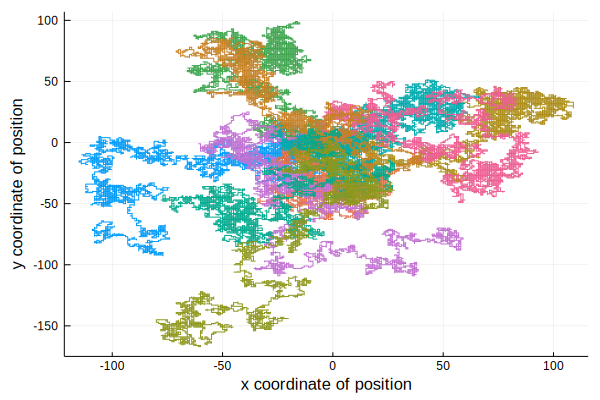

In [35]:
num_trials = 10
N = 10000

p = plot()

for i in 1:num_trials
    walker = Walker(0,0)
    #plot(first.(v), last.(v))
    pos_list = trajectory(walker,N)
    plot!(first.(pos_list),last.(pos_list),leg=false)
    xlabel!("x coordinate of position")
    ylabel!("y coordinate of position")
end
p

**Question 2**

**Question 2.1**

In [16]:
@enum InfectionStatus S I R

In [17]:
mutable struct Agent <: Abstract2DWalker
    position :: Location
    state :: InfectionStatus
end

**Question 2.2)**

In [18]:
function jump(agent, L)
    newloc = jump(agent)
    if abs(newloc.x)>L/2 || abs(newloc.y)>L/2
        return pos(agent)
    end
    return newloc
end

jump (generic function with 2 methods)

**Question 2.3)**

In [19]:
function plotBox(L)
    xlabel!("x coordinate of position")
    ylabel!("y coordinate of position")
    vline!([L/2],color="red",xlim=(-L/2,L/2))
    vline!([-L/2],color="red",xlim=(-L/2,L/2))
    hline!([L/2],color="red",ylim=(-L/2,L/2))
    hline!([-L/2],color="red",ylim=(-L/2,L/2))
    plot!(leg=false)
end

plotBox (generic function with 1 method)

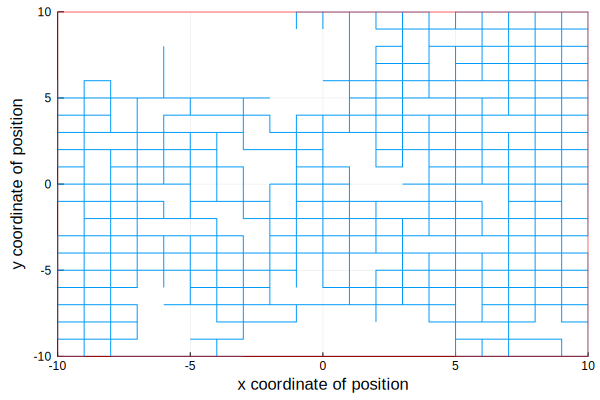

In [20]:
L= 20
N=2500
Agent(S)=Agent(Location(0,0),S) #for starting at origin
ag = Agent(S)
results = trajectory(ag,N,L)
plot(first.(results),last.(results))
plotBox(L)

**Question 3**

**Question 3.1**

In [21]:
function initialize(L,N)
    s = [] #agents list
    taken_locations = []
    for i in 1:N
        location = find_pos(taken_locations,L/2)
        agent = Agent(location,S)
        push!(s,agent)
        push!(taken_locations,location)
    end
    #infect first one
    s[1].state = I
    return s
end

initialize (generic function with 1 method)

In [22]:
function find_pos(taken_locations,L)
    loc = Location(rand(-L:L),rand(-L:L))
    while loc in taken_locations
        loc = Location(rand(-L:L),rand(-L:L))
    end
    return loc
end

find_pos (generic function with 1 method)

**Question 2.2)**

In [23]:
aglist = initialize(10,20)

20-element Array{Any,1}:
 Agent(Location(-2, 0), I)
 Agent(Location(-5, -5), S)
 Agent(Location(2, -5), S)
 Agent(Location(2, -2), S)
 Agent(Location(3, -1), S)
 Agent(Location(4, 3), S)
 Agent(Location(4, -3), S)
 Agent(Location(-1, -2), S)
 Agent(Location(-4, -2), S)
 Agent(Location(3, -5), S)
 Agent(Location(-2, -5), S)
 Agent(Location(5, -5), S)
 Agent(Location(-2, 4), S)
 Agent(Location(-1, -3), S)
 Agent(Location(-2, -3), S)
 Agent(Location(-1, -4), S)
 Agent(Location(1, -5), S)
 Agent(Location(0, -4), S)
 Agent(Location(-4, -5), S)
 Agent(Location(-1, -5), S)

**Question 2.3)**

In [24]:
function visualize_agents(agents)
    p = plot()
    for i in 1:length(agents)
        agent = agents[i]
        cs=[1,5,10]
        scatter!(make_tuple(agent.position),c=getcolor(agent),ratio=1,leg=false)
    end
    xlabel!("x coordinate of position")
    ylabel!("y coord of position")
    title!("location and status of agents, red=I,green=R,yellow=S")
end

visualize_agents (generic function with 1 method)

In [25]:
function getcolor(agent)
    if agent.state == I
        return "red"
    elseif agent.state == S
        return "yellow"
    else
        return "green"
    end
end

getcolor (generic function with 1 method)

**Question 2.4)**

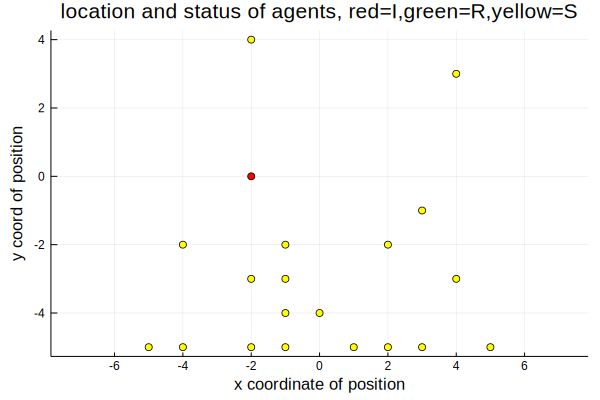

In [26]:
visualize_agents(aglist)
plot!()

**Question 3**

**Question 3.1)**

In [27]:
function step!(agents,L,p_I,p_R)
    
    i = rand(1:length(agents))
    agent_i = agents[i]
    
    random_pos = Location(rand(-L/2:L/2),rand(-L/2:L/2))
    
    occupied = false
    j = 1
    while(j<=length(agents) && occupied == false)
        if agents[j].position == random_pos
            occupied = true
        else
            j+=1
        end

    end
    
    if occupied == false
        set_pos!(agent_i,random_pos)
    else
        if agent_i.state==I && agents[j].state==S && rand()<p_I
            agents[j].state=I
        end
        if agent_i.state==I && rand()<p_R
            agent_i.state=R
        end    
    end 
end

step! (generic function with 1 method)

**Question 3.2)**

In [28]:
num_steps = 100
num_agents =20
L=10
p_I=0.2
p_R=0.05
agent_list = initialize(L,num_agents)
for i in 1:num_steps
    step!(agent_list,L,p_I,p_R)
end
agent_list

20-element Array{Any,1}:
 Agent(Location(3, 5), I)
 Agent(Location(-3, 5), S)
 Agent(Location(3, 2), S)
 Agent(Location(-4, -1), S)
 Agent(Location(4, -3), S)
 Agent(Location(2, 5), S)
 Agent(Location(-1, -4), S)
 Agent(Location(3, 1), S)
 Agent(Location(5, 1), S)
 Agent(Location(4, 5), S)
 Agent(Location(-1, -1), S)
 Agent(Location(2, 0), S)
 Agent(Location(-4, 2), S)
 Agent(Location(-1, -5), S)
 Agent(Location(-5, 0), S)
 Agent(Location(-2, 1), S)
 Agent(Location(3, -1), S)
 Agent(Location(1, 1), S)
 Agent(Location(3, -5), S)
 Agent(Location(4, 1), S)

In [29]:
using Interact
myP = plot()
agent_list = initialize(L,num_agents)
@manipulate for step in slider(1:num_steps,value=1)
    step!(agent_list,L,p_I,p_R)
    visualize_agents(agent_list)
    plot!()
end

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17351243828296406838\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-920968233254156263\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17351243828296406838\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012abfcb50, Task (runnable) @0x000000012abfcb50), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\

In [30]:
function sweep!(agents,L,p_I,p_R)
    for i in 1:length(agents)
        step!(agents,L,p_I,p_R)
    end
end

sweep! (generic function with 1 method)

In [31]:
function dynamics!(agents,L,p_I,p_R,num_sweeps)
    states = []
    Icount = zeros(N)
    Scount = zeros(N)
    Rcount= zeros(N)
    for i in 1:num_sweeps
        sweep!(agents,L,p_I,p_R)
        push!(states,agents)
        Icount[i] = count([agents[index].state for index in 1:length(agents)].== I)
        Scount[i] = count([agents[index].state for index in 1:length(agents)].== S)
        Rcount[i] = count([agents[index].state for index in 1:length(agents)].== R)
    end
    return states,Icount,Scount,Rcount
end

dynamics! (generic function with 1 method)

In [32]:
N= 100
L = 20
p_I = 0.2
p_R = 0.01
num_sweeps = 50

result = dynamics!(initialize(L,num_agents),L,p_I,p_R,N)
@manipulate for i in slider(1:N,value=1)
    visualize_agents(result[1][i])
    p1 = plot!()
    
    p2=plot()
    x = [1:i]
    plot!(x,result[2][1:i],label="infected",m=:o)
    plot!(x,result[3][1:i],label="susceptible",m=:o)
    plot!(x,result[4][1:i],label="recovered",m=:o)
    xlabel!("time")
    ylabel!("number of people")
    
    hbox(p1,p2)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 100,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/richterjordaan/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/richterjordaan/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001121058d0, Task (runnable) @0x00000001121058d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\

**Question 3.7)**

Using the graph above, when p_R = 0.01 and p_I = 0.4 and using 50 sweeps, there is an outbreak. As expected, it also depends a bit on randomness (selecting the first infected person early, and rand() being less than p_I when conditions are met for potential infection). But as I choose higher p_I, I'm seeing more and more often outbreaks.

**Question 3.8)**

In [33]:
import Pkg;
Pkg.add("StatsBase");
using StatsBase;

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


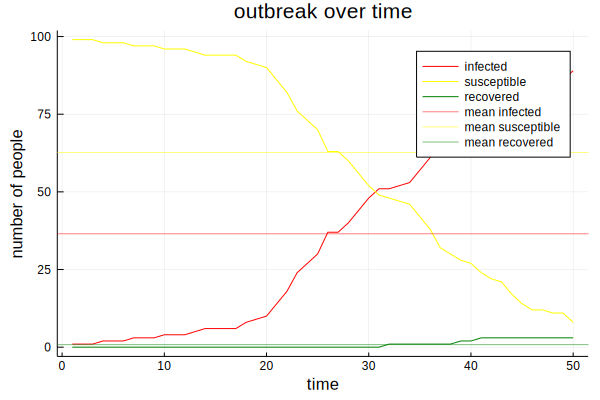

In [39]:
num_sim = 50
L = 20
N = 100
p_I = 0.6
p_R = 0.01
agentlist = initialize(L,N)

Is = zeros(num_sim)
Ss = zeros(num_sim)
Rs = zeros(num_sim)

for i in 1:num_sim
    sweep!(agentlist,L,p_I,p_R)
    Is[i] = count([agentlist[index].state for index in 1:length(agentlist)].== I)
    Ss[i] = count([agentlist[index].state for index in 1:length(agentlist)].== S)
    Rs[i] = count([agentlist[index].state for index in 1:length(agentlist)].== R)
end

plot(Is,label="infected",c="red")
plot!(Ss,label = "susceptible",c="yellow")
plot!(Rs,label="recovered",c="green")

hline!([mean(Is)],label="mean infected",c="red",alpha=0.5)
hline!([mean(Ss)],label="mean susceptible",c="yellow",alpha=0.5)
hline!([mean(Rs)],label="mean recovered",c="green",alpha=0.5)

xlabel!("time")
ylabel!("number of people")
title!("outbreak over time")

Code to extract data from Pset4 to be used in Pset5:

In [40]:
Ts = 1:num_sim
M = hcat(Ts,Ss,Is,Rs)

50×4 Array{Float64,2}:
  1.0  99.0   1.0  0.0
  2.0  99.0   1.0  0.0
  3.0  99.0   1.0  0.0
  4.0  98.0   2.0  0.0
  5.0  98.0   2.0  0.0
  6.0  98.0   2.0  0.0
  7.0  97.0   3.0  0.0
  8.0  97.0   3.0  0.0
  9.0  97.0   3.0  0.0
 10.0  96.0   4.0  0.0
 11.0  96.0   4.0  0.0
 12.0  96.0   4.0  0.0
 13.0  95.0   5.0  0.0
  ⋮                
 39.0  28.0  70.0  2.0
 40.0  27.0  71.0  2.0
 41.0  24.0  73.0  3.0
 42.0  22.0  75.0  3.0
 43.0  21.0  76.0  3.0
 44.0  17.0  80.0  3.0
 45.0  14.0  83.0  3.0
 46.0  12.0  85.0  3.0
 47.0  12.0  85.0  3.0
 48.0  11.0  86.0  3.0
 49.0  11.0  86.0  3.0
 50.0   8.0  89.0  3.0

In [38]:
using Pkg
Pkg.add("Tables")
using CSV, Tables

  Resolving package versions...
  Installed Tables ─ v1.0.4
   Updating `~/.julia/environments/v1.4/Project.toml`
  [bd369af6] + Tables v1.0.4
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [bd369af6] ↑ Tables v1.0.3 ⇒ v1.0.4


In [41]:
CSV.write("my_data.csv",Tables.table(M))

"my_data.csv"